## Príklad 2 ##

$$D.T.$$

Načítanie potrebných knižníc:

In [1]:
%matplotlib inline
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Image
sp.init_printing()

Pri prúte zaťaženom podľa obrázku stanovte veľkosť spojitého rovnomernéh líniového zaťaženia $q$ , ktoré vyvolá v danom prúte medzný stav pružnosti.
Dané parametre:

\begin{align*}
\sigma_K = & \,250\, MPa \\
a = & \, 400\,mm\\
b = & \, 100\,mm\\
d = & \, 50\,mm\\
\end{align*}

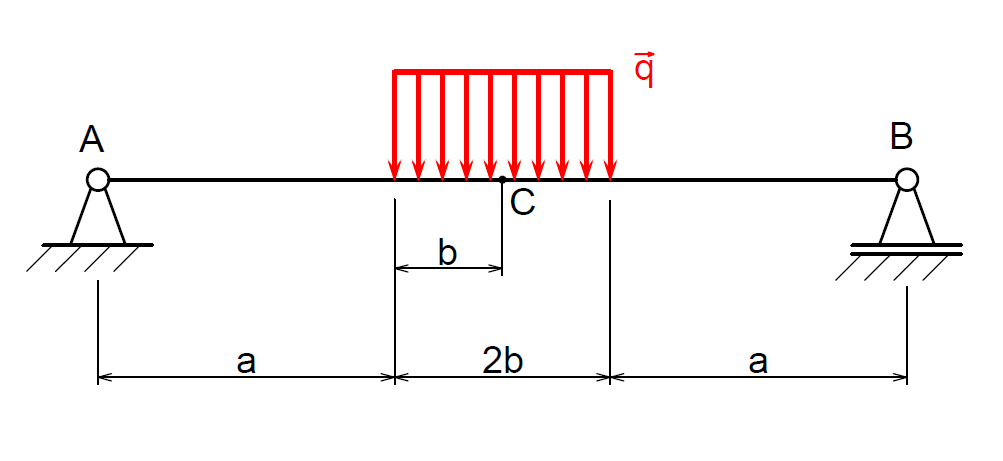

In [2]:
Image(filename='Ohyb2a.PNG', width=800, height=300)

$Rozbor:$ Daný prút je uložený staticky určito. K určeniu vnútorých výsledných účinkov potrebujeme stanoviť výsledné stykové sily, ktoré určíme z podmienky statickej rovnováhy úplne uvoľneného prvku.

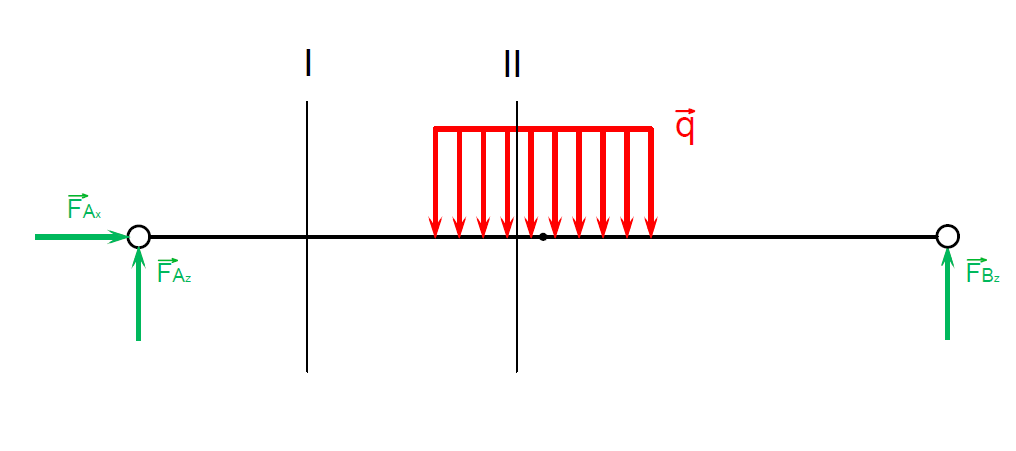

In [3]:
Image(filename='Ohyb2b.PNG', width=800, height=300)

__Určenie vsledných stykových síl:__

$\sum F_x = 0 :\quad F_{Ax} = 0 $

$\sum F_z = 0 :\quad F_{Az} + F_{Bz} - 2qb = 0 \quad \to F_{Az} = 2qb - F_{Bz}$

$\sum My_A = 0:\quad F_{Bz}(2a + 2b) - 2qb(a + b) = 0\quad \to F_{Bz} = qb$

$F_{Az} = qb = F_{Bz}$

Vzhľadom k zmene zaťaženia po dĺžke strednice s využitím symetrie prútu určíme $VVÚ:$ 

Úsek I:

pre $x_1 \in(0,a)$

\begin{align*}
N_1(x) =\: & 0 \\ T_1(x) =\: & F_{Az} = qb \\ M_{o1}(x) =\: & F_{Az}x_1 = qbx_1\\
\end{align*}

Úsek II:

pre $x_2 \in(0,b)$

\begin{align*}
N_2(x) = \: & 0 \\ T_2(x) = \: & F_{Az} - qx_2 = qb - qx_2 = q(b-x_2) \\ M_{o2}(x) = \: & F_{Az}(a+x_2) - \frac{qx_2^{2}}{2} = qb(a+x_2) - \frac{qx_2^2}{2} \\
\end{align*}

Zavedenie potrebných symbolov:

In [4]:
a, b, d = sp.symbols('a b d')
q = sp.symbols('q')
sigmaK = sp.symbols('\sigma_K')
x1, x2 = sp.symbols('x_1 x_2')

Zapísané do Pythonu:

In [5]:
T1 = q*b
M1 = q*b*x1
T1, M1

In [6]:
T2 = q*(b-x2)
M2 = q*b*(a+x2) - q*x2**2/2
T2, M2

Maximálny ohybový moment je v bode C: 

$$\frac{d}{dx} M_{o2}(x)= T_2(x) = 0\quad \to x_2=b $$ 

$$M_{o_{max}} = M_{o2}(x_2 = b)= qb(a+b) - \frac{qb^2}{2} = qb\left(a+\frac{b}{2}\right)$$

In [7]:
Mmax = q*b*(a + b/2)
Mmax

Podmienka pre vznik medzného stavu pružnosti:

$$\sigma_K = \sigma_{max} \quad \to \frac{M_{o_{max}}}{W_o}=\sigma_K \quad \to M_{o_{max}}=\sigma_K W_o$$

In [8]:
Wo = sp.pi*d**3/32
rov = sigmaK*Wo - Mmax
rov

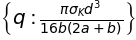

In [9]:
vysl = sp.solve([rov],[q])
vysl

Dosadenie čísel pre numerický výpočet:

In [10]:
a_,b_,d_ = 0.4, 0.1, 0.05
sigmaK_ = 250e6

Vyčíslenie mdznej hodnoty líniového zaťaženia $q_K$:

In [11]:
qK = vysl[q].subs({sigmaK:sigmaK_, a:a_, b:b_, d:d_})
odpoved = 'Medzná hodnota spojitého líniového zaťaženia pre vyvolanie medzného stavu pružnosti je: ' +repr(round(float(qK),3))+ ' N/m.'
print(odpoved)

Medzná hodnota spojitého líniového zaťaženia pre vyvolanie medzného stavu pružnosti je: 68176.924 N/m.


Dosadenie číslednej hodnoty $q_K$ do vnútorných účinkov:

In [12]:
T1_ = T1.subs({q:round(float(qK),3), b:b_})
M1_ = M1.subs({q:round(float(qK),3), b:b_})
T1_, M1_

In [13]:
T2_ = T2.subs({q:round(float(qK),3), b:b_})
M2_ = M2.subs({q:round(float(qK),3), b:b_, a:a_})
T2_, M2_

__Vyjadrenie výsledných vnútorných účinkov__

Vyjadrenie VVÚ pozdĺž strednice

In [14]:
x1_ = np.linspace(0,a_,20)
T1_plot = [float(T1_) for ii in x1_]
M1_plot = [float(M1_.subs(x1,ii)) for ii in x1_]
x2_ = np.linspace(0,b_,20)
T2_plot = [float(T2_.subs(x2,ii)) for ii in x2_]
M2_plot = [float(M2_.subs(x2,ii)) for ii in x2_]
x3_ = np.linspace(0,b_,20)
T3_plot = [-1*float(T2_.subs(x2,ii)) for ii in x3_]
M3_plot = [float(M2_.subs(x2,ii)) for ii in x3_]
x4_ = np.linspace(0,a_,20)
T4_plot = [-1*float(T1_) for ii in x4_]
M4_plot = [float(M1_.subs(x1,ii)) for ii in x4_]

Vykreslenie šmykových vnútorných účinkov $T(x)$ po celej dĺžke prútu:

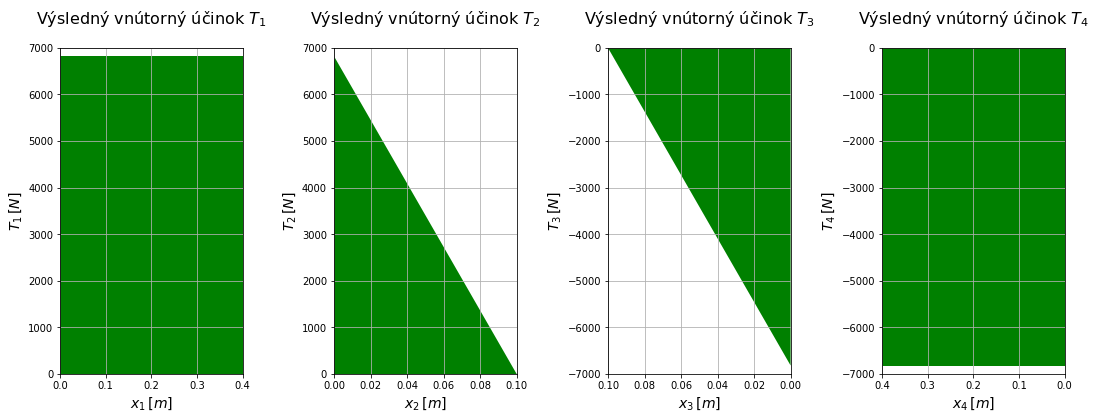

In [15]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(18,6))
fig.subplots_adjust(wspace=0.5)

ax1.fill_between(x1_,0,T1_plot,facecolor='green')
ax2.fill_between(x2_,0,T2_plot,facecolor='green')
ax3.fill_between(x3_,0,T3_plot,facecolor='green')
ax4.fill_between(x4_,0,T4_plot,facecolor='green')

ax1.set_xlim(0,0.4)
ax1.set_ylim(0,7000)
ax2.set_xlim(0,0.1)
ax2.set_ylim(0,7000)
ax3.set_xlim(0.1,0)
ax3.set_ylim(-7000,0)
ax4.set_xlim(0.4,0)
ax4.set_ylim(-7000,0)

ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
ax1.set_xlabel(r'$x_1\,[m]$').set_fontsize(14)
ax1.set_ylabel(r'$T_1\,[N]$').set_fontsize(14)
ax2.set_xlabel(r'$x_2\,[m]$').set_fontsize(14)
ax2.set_ylabel(r'$T_2\,[N]$').set_fontsize(14)
ax3.set_xlabel(r'$x_3\,[m]$').set_fontsize(14)
ax3.set_ylabel(r'$T_3\,[N]$').set_fontsize(14)
ax4.set_xlabel(r'$x_4\,[m]$').set_fontsize(14)
ax4.set_ylabel(r'$T_4\,[N]$').set_fontsize(14)
ax1.set_title('Výsledný vnútorný účinok '+r'$T_1$'+'\n').set_fontsize(16)
ax2.set_title('Výsledný vnútorný účinok '+r'$T_2$'+'\n').set_fontsize(16)
ax3.set_title('Výsledný vnútorný účinok '+r'$T_3$'+'\n').set_fontsize(16)
ax4.set_title('Výsledný vnútorný účinok '+r'$T_4$'+'\n').set_fontsize(16)

Vykreslenie vnútorných momentových účinkov $M_o(x)$ po celej dĺžke prútu:

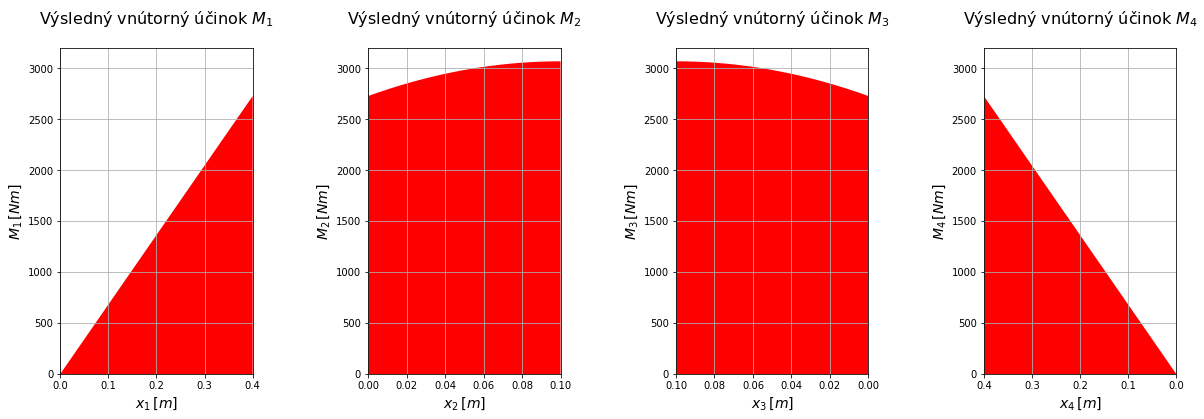

In [16]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(20,6))
fig.subplots_adjust(wspace=0.6)

ax1.fill_between(x1_,0,M1_plot,facecolor='red')
ax2.fill_between(x2_,0,M2_plot,facecolor='red')
ax3.fill_between(x3_,0,M3_plot,facecolor='red')
ax4.fill_between(x4_,0,M4_plot,facecolor='red')

ax1.set_xlim(0,0.4)
ax1.set_ylim(0,3200)
ax2.set_xlim(0,0.1)
ax2.set_ylim(0,3200)
ax3.set_xlim(0.1,0)
ax3.set_ylim(0,3200)
ax4.set_xlim(0.4,0)
ax4.set_ylim(0,3200)

ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
ax1.set_xlabel(r'$x_1\,[m]$').set_fontsize(14)
ax1.set_ylabel(r'$M_1\,[Nm]$').set_fontsize(14)
ax2.set_xlabel(r'$x_2\,[m]$').set_fontsize(14)
ax2.set_ylabel(r'$M_2\,[Nm]$').set_fontsize(14)
ax3.set_xlabel(r'$x_3\,[m]$').set_fontsize(14)
ax3.set_ylabel(r'$M_3\,[Nm]$').set_fontsize(14)
ax4.set_xlabel(r'$x_4\,[m]$').set_fontsize(14)
ax4.set_ylabel(r'$M_4\,[Nm]$').set_fontsize(14)
ax1.set_title('Výsledný vnútorný účinok '+r'$M_1$'+'\n').set_fontsize(16)
ax2.set_title('Výsledný vnútorný účinok '+r'$M_2$'+'\n').set_fontsize(16)
ax3.set_title('Výsledný vnútorný účinok '+r'$M_3$'+'\n').set_fontsize(16)
ax4.set_title('Výsledný vnútorný účinok '+r'$M_4$'+'\n').set_fontsize(16)